In [1]:
#Prevent Large File crashing on Jupyter Notebook
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import pandas as pd
import numpy as np
#import vaex, numpy as np
from matplotlib.font_manager import FontProperties
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import datetime
import warnings 
#sns.set_style("darkgrid",{"axes.axisbelow" : False })
warnings.simplefilter('ignore')
import string

# Data Exploration

In [3]:
amazon = pd.read_csv('amazon_metadata.csv')
gr     = pd.read_csv('goodreads_metadata.csv')

### Checking missing value

In [4]:
amazon.isnull().sum()

asin                  0
average               0
rating_count          0
text_reviews_count    0
genres                0
dtype: int64

In [5]:
gr.isnull().sum()

asin                        0
ratings_count               0
reviews_count               0
text_reviews_count          0
total_ratings_count         0
total_reviews_count         0
total_text_reviews_count    0
average_rating              0
dtype: int64

# Plot the distribution of the average rating 

In [6]:
amazon.describe()

,average,rating_count,text_reviews_count
count,37233.000000,37233.000000,37233.000000
mean,4.261219,152.651680,152.615798
std,0.422799,702.459338,702.255076
min,1.080000,6.000000,6.000000
25%,4.040000,22.000000,22.000000
50%,4.330000,43.000000,43.000000
75%,4.570000,107.000000,107.000000
max,5.000000,44956.000000,44947.000000


In [7]:
gr.describe()

,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,average_rating
count,3.723300e+04,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04,37233.000000,37233.000000
mean,2.141833e+03,4.211693e+03,145.747267,1.147746e+04,1.963290e+04,614.953992,3.873311
std,2.213376e+04,2.996176e+04,974.148611,8.537788e+04,1.153654e+05,3121.161743,0.306148
min,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,0.000000,2.320000
25%,5.900000e+01,1.500000e+02,9.000000,2.270000e+02,6.300000e+02,27.000000,3.690000
50%,1.860000e+02,5.060000e+02,24.000000,8.210000e+02,2.103000e+03,83.000000,3.890000
75%,6.900000e+02,1.797000e+03,75.000000,3.416000e+03,7.850000e+03,292.000000,4.080000
max,2.056193e+06,2.238009e+06,68752.000000,4.718437e+06,5.684376e+06,152766.000000,5.000000


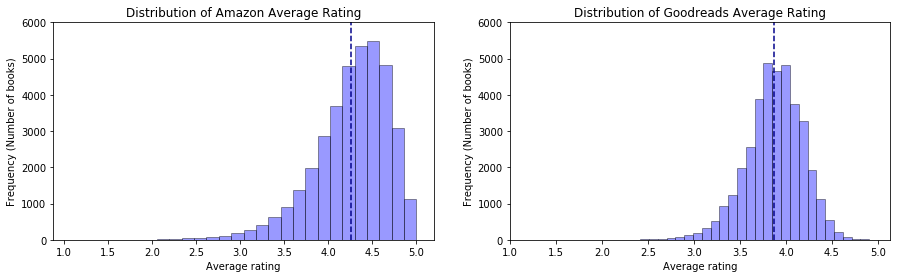

In [8]:
fig,ax=plt.subplots(1, 2, figsize=(15,4))

# Distribution of Amazon Average Rating
sns.distplot(amazon.average, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'},
            ax=ax[0])
ax[0].set_title('Distribution of Amazon Average Rating')
ax[0].axvline(amazon.describe().average['mean'], 0, color='darkblue', linestyle='--')

# Distribution of Goodreads Average Rating
sns.distplot(gr.average_rating, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'},
            ax = ax[1])
ax[1].set_title('Distribution of Goodreads Average Rating')
ax[1].axvline(gr.describe().average_rating['mean'], 0, color='darkblue', linestyle='--')

# Making plots uniform for easier side-by-side comparison
for i in range(2):
    ax[i].set_xlabel('Average rating')
    ax[i].set_ylabel('Frequency (Number of books)')
    ax[i].set_xticks(np.arange(1,5.5,0.5))
    ax[i].set_ylim(0,6000,1000)

plt.show()

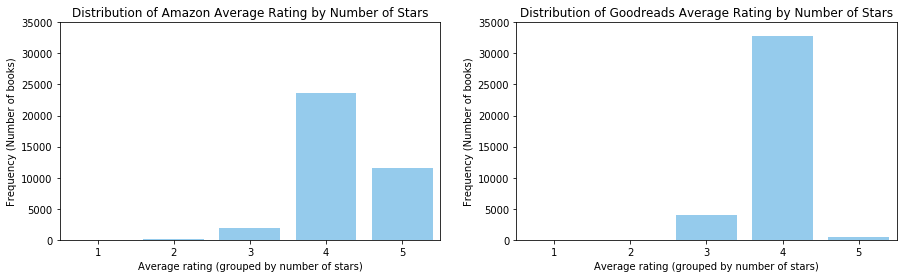

In [9]:
fig,ax=plt.subplots(1, 2, figsize=(15,4))

# Distribution of Amazon Average Rating by Number of Stars
sns.countplot(x=np.round(amazon.average,0),  order=list(range(1,6)), color='lightskyblue', ax=ax[0])
ax[0].set_title('Distribution of Amazon Average Rating by Number of Stars')

# Distribution of Goodreads Average Rating by Number of Stars
sns.countplot(x=np.round(gr.average_rating,0), order=list(range(1,6)), color='lightskyblue', ax=ax[1])
ax[1].set_title('Distribution of Goodreads Average Rating by Number of Stars')

# Making plots uniform for easier side-by-side comparison
for i in range(2):
    ax[i].set_xlabel('Average rating (grouped by number of stars)')
    ax[i].set_ylabel('Frequency (Number of books)')
    ax[i].set_ylim(0,35000,5000)

plt.show()

### Average rating vs number of reviews

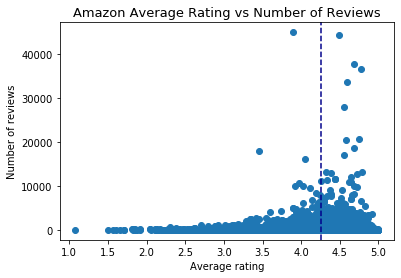

In [10]:
plt.scatter(amazon.average,amazon.rating_count)
plt.title('Amazon Average Rating vs Number of Reviews', size = 13)
plt.axvline(amazon.describe().average['mean'], 0, color='darkblue', linestyle='--')
plt.xlabel('Average rating')
plt.ylabel('Number of reviews')
plt.xticks(np.arange(1,5.5,0.5))
plt.show()

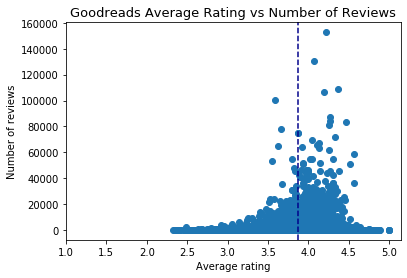

In [11]:
plt.scatter(gr.average_rating,gr.total_text_reviews_count)
plt.title('Goodreads Average Rating vs Number of Reviews', size = 13)
plt.axvline(gr.describe().average_rating['mean'], 0, color='darkblue', linestyle='--')
plt.xlabel('Average rating')
plt.ylabel('Number of reviews')
plt.xticks(np.arange(1,5.5,0.5))
plt.show()

## Amazon rating - Goodreads rating

In [12]:
amazon_gr = pd.merge(amazon, gr, how = 'inner', on ='asin')

In [13]:
amazon_gr['rating_diff'] = amazon_gr['average'] -  amazon_gr['average_rating']

In [14]:
am_gr = pd.DataFrame(amazon_gr, columns = ['asin','rating_diff','average','rating_count', 'text_reviews_count_x','total_ratings_count',
                                           'total_text_reviews_count', 'average_rating','genres'])

In [15]:
am_gr = am_gr.rename(columns = {'average':'amazon_average', 'rating_count': 'amazon_rating_count', 
                                'text_reviews_count_x': 'amazon_text_reviews_count', 'total_ratings_count': 'gr_rating_count',
                                'total_text_reviews_count':'gr_text_reviews_count', 'average_rating': 'gr_average'})

In [16]:
am_gr

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,genres
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction"
1,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction"
2,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction
3,0002007649,-0.20,3.37,19,19,356,41,3.57,"Science & Math, Chemistry"
4,0001716069,0.79,4.61,59,59,1559,102,3.82,"Literature & Fiction, Poetry"
...,...,...,...,...,...,...,...,...,...
37228,0312943636,0.44,4.17,24,24,1795,134,3.73,"Literature & Fiction, Fiction"
37229,0312953038,0.25,4.00,27,27,1128,59,3.75,"Romance, Historical"
37230,0312955154,-0.07,3.29,14,14,56,5,3.36,"Literature & Fiction, Fiction"
37231,0312956878,-0.45,3.33,15,15,59,4,3.78,"Biographies & Memoirs, True Crime"


In [17]:
am_gr.describe()

,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average
count,37233.000000,37233.000000,37233.000000,37233.000000,3.723300e+04,37233.000000,37233.000000
mean,0.387908,4.261219,152.651680,152.615798,1.147746e+04,614.953992,3.873311
std,0.335298,0.422799,702.459338,702.255076,8.537788e+04,3121.161743,0.306148
min,-2.780000,1.080000,6.000000,6.000000,1.000000e+00,0.000000,2.320000
25%,0.210000,4.040000,22.000000,22.000000,2.270000e+02,27.000000,3.690000
50%,0.410000,4.330000,43.000000,43.000000,8.210000e+02,83.000000,3.890000
75%,0.590000,4.570000,107.000000,107.000000,3.416000e+03,292.000000,4.080000
max,1.990000,5.000000,44956.000000,44947.000000,4.718437e+06,152766.000000,5.000000


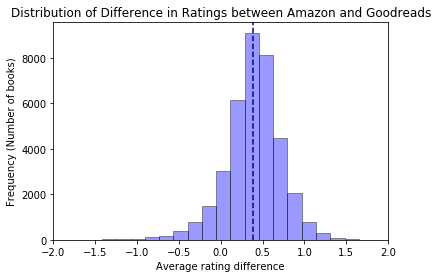

In [18]:
sns.distplot(am_gr.rating_diff, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Average rating difference')
plt.ylabel('Frequency (Number of books)')
plt.title('Distribution of Difference in Ratings between Amazon and Goodreads')
plt.xlim(-2,2)
plt.axvline(am_gr.describe().rating_diff['mean'], 0, color='darkblue', linestyle='--')
plt.show()

In [19]:
am_gr['rating_count'] = am_gr['amazon_rating_count']+am_gr['gr_rating_count']
am_gr['text_reviews_count'] = am_gr['amazon_text_reviews_count']+am_gr['gr_text_reviews_count']
am_gr

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,genres,rating_count,text_reviews_count
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction",691,109
1,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction",266,81
2,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction,845,172
3,0002007649,-0.20,3.37,19,19,356,41,3.57,"Science & Math, Chemistry",375,60
4,0001716069,0.79,4.61,59,59,1559,102,3.82,"Literature & Fiction, Poetry",1618,161
...,...,...,...,...,...,...,...,...,...,...,...
37228,0312943636,0.44,4.17,24,24,1795,134,3.73,"Literature & Fiction, Fiction",1819,158
37229,0312953038,0.25,4.00,27,27,1128,59,3.75,"Romance, Historical",1155,86
37230,0312955154,-0.07,3.29,14,14,56,5,3.36,"Literature & Fiction, Fiction",70,19
37231,0312956878,-0.45,3.33,15,15,59,4,3.78,"Biographies & Memoirs, True Crime",74,19


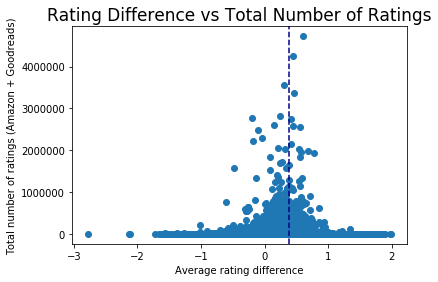

In [20]:
plt.scatter(am_gr.rating_diff, am_gr.rating_count)
plt.title('Rating Difference vs Total Number of Ratings', size = 17)
plt.xlabel('Average rating difference', size=10)
plt.ylabel('Total number of ratings (Amazon + Goodreads)', size=10)
plt.axvline(am_gr.describe().rating_diff['mean'], 0, color='darkblue', linestyle='--')
plt.show()

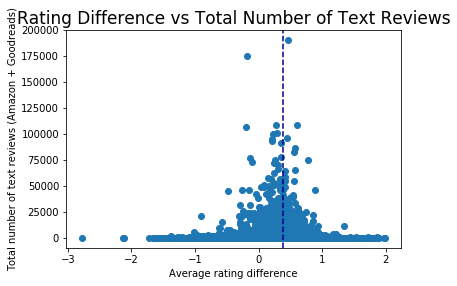

In [21]:
plt.scatter(am_gr.rating_diff, am_gr.text_reviews_count)
plt.title('Rating Difference vs Total Number of Text Reviews', size = 17)
plt.xlabel('Average rating difference', size =10)
plt.ylabel('Total number of text reviews (Amazon + Goodreads)', size=10)
plt.axvline(am_gr.describe().rating_diff['mean'], 0, color='darkblue', linestyle='--')
plt.show()

In [22]:
#genres = am_gr.genres

In [23]:
'''unique_genres = dict()
for genre in genres:
    genre_split = genre.split(',')
    for g in genre_split:
        if g in unique_genres:
            unique_genres[g] += 1
        else:
            unique_genres[g] = 1'''

"unique_genres = dict()\nfor genre in genres:\n    genre_split = genre.split(',')\n    for g in genre_split:\n        if g in unique_genres:\n            unique_genres[g] += 1\n        else:\n            unique_genres[g] = 1"

In [24]:
#unique_genres

In [25]:
'''filtered_genres = dict()
for k,v in unique_genres.items():
    if v > 1000:
        filtered_genres[k] = v'''

'filtered_genres = dict()\nfor k,v in unique_genres.items():\n    if v > 1000:\n        filtered_genres[k] = v'

# Book Metadata

In [26]:
book = pd.read_csv('book_metadata.csv')
book

,book_id,publication_year,publication_month,publication_day,publisher,description,num_pages,format,genres,asin
0,780911,2002.0,9.0,16.0,Houghton Mifflin Harcourt,"""Michel Faber leads us back to 1870s London, w...",838.0,Hardcover,"{'fiction': 2428, 'history, historical fiction...",015100692X
1,926667,1964.0,3.0,18.0,Mariner Books,A modern verse play about the search for meani...,190.0,Paperback,"{'fiction': 30, 'poetry': 29}",0156182890
2,18498572,2014.0,5.0,6.0,Broadside Books,"The dramatic, first-hand account of the histor...",384.0,Hardcover,"{'history, historical fiction, biography': 30,...",0062310194
3,268464,2007.0,5.0,29.0,William Morrow,Celebrity journalist Amelia Stone is the quint...,288.0,Hardcover,"{'fiction': 15, 'history, historical fiction, ...",0061198722
4,598199,2001.0,2.0,22.0,"Oxford University Press, USA","Throughout African-American history, religion ...",184.0,Paperback,"{'history, historical fiction, biography': 10,...",0195145852
...,...,...,...,...,...,...,...,...,...,...
37234,5582304,2009.0,6.0,1.0,Da Capo Press,Drawing on intimate recollections from friends...,440.0,Hardcover,"{'history, historical fiction, biography': 22,...",0306815869
37235,3106983,2008.0,3.0,6.0,Vintage,The Story of a Childhood and The Story of a Re...,343.0,Paperback,"{'comics, graphic': 7696, 'non-fiction': 1811,...",009952399X
37236,11873,2004.0,7.0,1.0,Vintage Classics,WINNER OF THE PULITZER PRIZE\nIn 1831 Nat Turn...,480.0,Paperback,"{'fiction': 688, 'history, historical fiction,...",0099285568
37237,823091,1988.0,1.0,1.0,Harcourt Brace College Publishers,NaN,NaN,Hardcover,{'non-fiction': 3},0153117362


In [27]:
book.describe()

,book_id,publication_year,publication_month,publication_day,num_pages
count,3.723900e+04,32955.000000,31926.000000,31664.000000,33231.000000
mean,7.281608e+06,2005.514489,6.355102,13.950227,320.532725
std,8.721178e+06,9.359460,3.345785,10.389918,188.363295
min,5.900000e+01,1900.000000,1.000000,1.000000,0.000000
25%,5.720380e+05,2002.000000,4.000000,4.000000,224.500000
50%,2.659586e+06,2008.000000,6.000000,13.000000,306.000000
75%,1.203250e+07,2012.000000,9.000000,24.000000,384.000000
max,3.638104e+07,2018.000000,12.000000,31.000000,5392.000000


In [90]:
book.isnull().sum()

book_id                 0
publication_year     4284
publication_month    5313
publication_day      5575
publisher            4344
description          1748
num_pages            4008
format               4616
genres                  0
asin                    0
dtype: int64

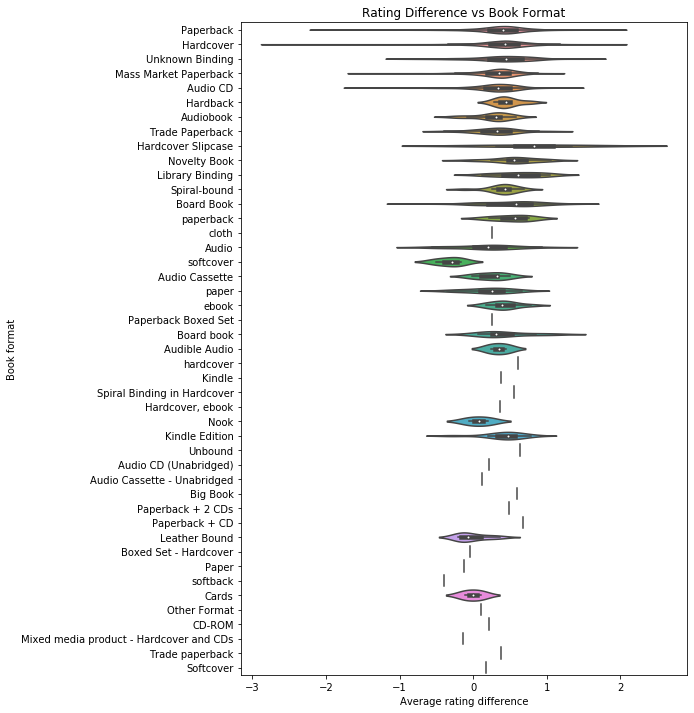

In [68]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="rating_diff", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Average rating difference')
plt.ylabel('Book format')
plt.title('Rating Difference vs Book Format')
plt.show()

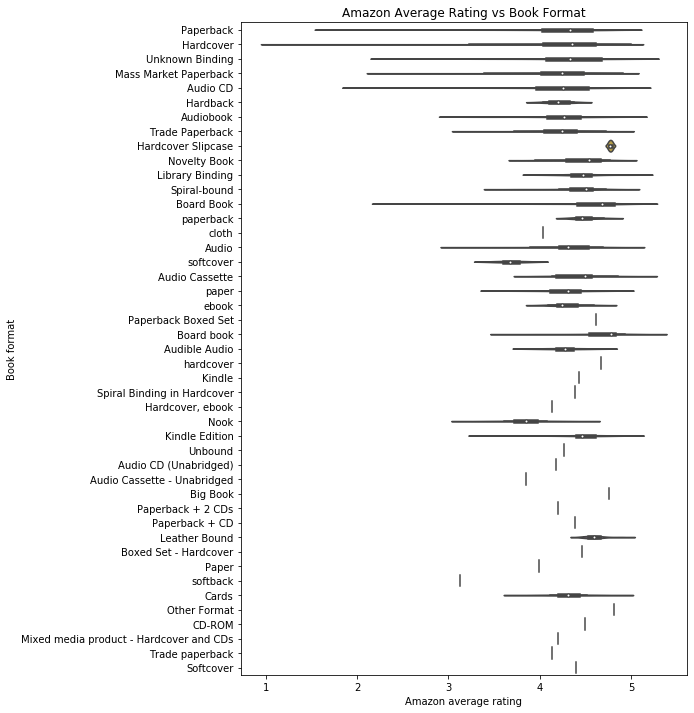

In [95]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="amazon_average", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Amazon average rating')
plt.ylabel('Book format')
plt.title('Amazon Average Rating vs Book Format')
plt.show()

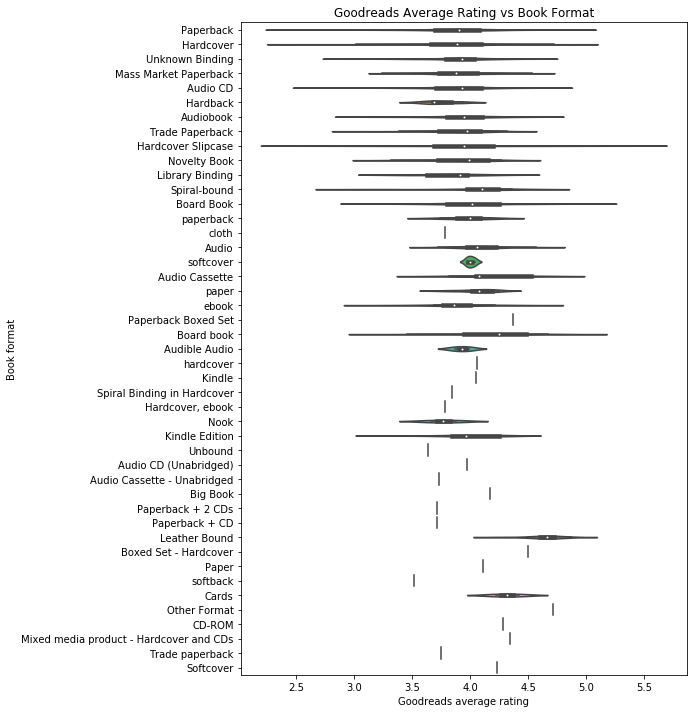

In [97]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="gr_average", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Goodreads average rating')
plt.ylabel('Book format')
plt.title('Goodreads Average Rating vs Book Format')
plt.show()

In [32]:
book_am_gr = pd.merge(am_gr, book, how = 'inner', on ='asin')

In [33]:
book_am_gr = book_am_gr.rename(columns = {'genres_x':'amazon_genres', 'genres_y': 'gr_genres'})

In [34]:
book_am_gr

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,amazon_genres,rating_count,text_reviews_count,book_id,publication_year,publication_month,publication_day,publisher,description,num_pages,format,gr_genres
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction",691,109,446759,1986.0,3.0,1.0,HarperCollins Publishers,A king runs into the trouble when he tries to ...,64.0,Paperback,"{'children': 62, 'fiction': 10}"
1,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction",266,81,5781677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'poetry': 66, 'children': 18}"
2,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction,845,172,432264,NaN,NaN,NaN,Random House,NaN,63.0,NaN,"{'children': 60, 'fiction': 8, 'poetry': 4, 'f..."
3,0002007649,-0.20,3.37,19,19,356,41,3.57,"Science & Math, Chemistry",375,60,2502768,2007.0,12.0,6.0,HarperCollins,Eat salmon. It's full of good omega-3 fats. Do...,384.0,Hardcover,{'non-fiction': 47}
4,0001716069,0.79,4.61,59,59,1559,102,3.82,"Literature & Fiction, Poetry",1618,161,275332,1990.0,9.0,20.0,HarperCollins,Pride and over-confidence may take many forms....,64.0,Paperback,"{'children': 216, 'fiction': 16, 'poetry': 7, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37234,0312943636,0.44,4.17,24,24,1795,134,3.73,"Literature & Fiction, Fiction",1819,158,6555008,2009.0,12.0,1.0,St. Martin's Paperbacks,"Thirteen years ago, Jack Winter lay dying in a...",346.0,Paperback,"{'fantasy, paranormal': 327, 'romance': 33, 'f..."
37235,0312953038,0.25,4.00,27,27,1128,59,3.75,"Romance, Historical",1155,86,500988,1994.0,9.0,15.0,St. Martin's Paperbacks,They were enemies in a divided land...\nSaxon ...,383.0,Paperback,"{'history, historical fiction, biography': 87,..."
37236,0312955154,-0.07,3.29,14,14,56,5,3.36,"Literature & Fiction, Fiction",70,19,1877760,1995.0,10.0,15.0,St. Martin's Press,Paleontologist Cameron Malone has discovered a...,NaN,Paperback,"{'mystery, thriller, crime': 4, 'fiction': 2}"
37237,0312956878,-0.45,3.33,15,15,59,4,3.78,"Biographies & Memoirs, True Crime",74,19,905252,1995.0,10.0,15.0,St. Martin's Paperbacks,A KILLER WITHOUT REDEMPTION...\nIn broad dayli...,608.0,Paperback,"{'mystery, thriller, crime': 9, 'non-fiction': 2}"


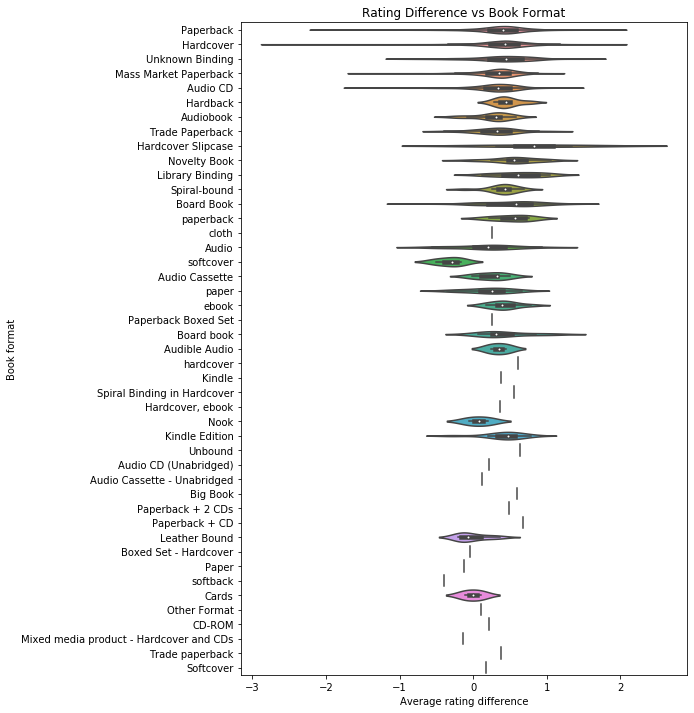

In [68]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="rating_diff", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Average rating difference')
plt.ylabel('Book format')
plt.title('Rating Difference vs Book Format')
plt.show()

In [72]:
book_cleaned = pd.read_csv('books_metadata_cleaned.csv')
book_cleaned

,book_id,publication_year,publication_month,publication_day,publisher,description,num_pages,format,genres,cleaned_genres
0,780911,2002.0,9.0,16.0,Houghton Mifflin Harcourt,"""Michel Faber leads us back to 1870s London, w...",838.0,Hardcover,"{'fiction': 2428, 'history, historical fiction...","fiction, history, historical fiction, biograph..."
1,926667,1964.0,3.0,18.0,Mariner Books,A modern verse play about the search for meani...,190.0,Paperback,"{'fiction': 30, 'poetry': 29}","fiction, poetry"
2,18498572,2014.0,5.0,6.0,Broadside Books,"The dramatic, first-hand account of the histor...",384.0,Hardcover,"{'history, historical fiction, biography': 30,...","history, historical fiction, biography, non-fi..."
3,268464,2007.0,5.0,29.0,William Morrow,Celebrity journalist Amelia Stone is the quint...,288.0,Hardcover,"{'fiction': 15, 'history, historical fiction, ...","fiction, history, historical fiction, biography"
4,598199,2001.0,2.0,22.0,"Oxford University Press, USA","Throughout African-American history, religion ...",184.0,Paperback,"{'history, historical fiction, biography': 10,...","history, historical fiction, biography, non-fi..."
...,...,...,...,...,...,...,...,...,...,...
37233,5582304,2009.0,6.0,1.0,Da Capo Press,Drawing on intimate recollections from friends...,440.0,Hardcover,"{'history, historical fiction, biography': 22,...","history, historical fiction, biography, non-fi..."
37234,3106983,2008.0,3.0,6.0,Vintage,The Story of a Childhood and The Story of a Re...,343.0,Paperback,"{'comics, graphic': 7696, 'non-fiction': 1811,...","comics, graphic, non-fiction, history, histori..."
37235,11873,2004.0,7.0,1.0,Vintage Classics,WINNER OF THE PULITZER PRIZE\nIn 1831 Nat Turn...,480.0,Paperback,"{'fiction': 688, 'history, historical fiction,...","fiction, history, historical fiction, biograph..."
37236,823091,1988.0,1.0,1.0,Harcourt Brace College Publishers,NaN,NaN,Hardcover,{'non-fiction': 3},non-fiction


In [74]:
book_cleaned = pd.DataFrame(book_cleaned,columns=['book_id','cleaned_genres'])
book_cleaned

,book_id,cleaned_genres
0,780911,"fiction, history, historical fiction, biograph..."
1,926667,"fiction, poetry"
2,18498572,"history, historical fiction, biography, non-fi..."
3,268464,"fiction, history, historical fiction, biography"
4,598199,"history, historical fiction, biography, non-fi..."
...,...,...
37233,5582304,"history, historical fiction, biography, non-fi..."
37234,3106983,"comics, graphic, non-fiction, history, histori..."
37235,11873,"fiction, history, historical fiction, biograph..."
37236,823091,non-fiction


In [76]:
book_am_gr = pd.merge(book_am_gr, book_cleaned, how = 'inner', on ='book_id')

In [77]:
book_am_gr

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,amazon_genres,rating_count,...,book_id,publication_year,publication_month,publication_day,publisher,description,num_pages,format,gr_genres,cleaned_genres
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction",691,...,446759,1986.0,3.0,1.0,HarperCollins Publishers,A king runs into the trouble when he tries to ...,64.0,Paperback,"{'children': 62, 'fiction': 10}","children, fiction"
1,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction",266,...,5781677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'poetry': 66, 'children': 18}","poetry, children"
2,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction,845,...,432264,NaN,NaN,NaN,Random House,NaN,63.0,NaN,"{'children': 60, 'fiction': 8, 'poetry': 4, 'f...","children, fiction, poetry, fantasy, paranormal"
3,0002007649,-0.20,3.37,19,19,356,41,3.57,"Science & Math, Chemistry",375,...,2502768,2007.0,12.0,6.0,HarperCollins,Eat salmon. It's full of good omega-3 fats. Do...,384.0,Hardcover,{'non-fiction': 47},non-fiction
4,0001716069,0.79,4.61,59,59,1559,102,3.82,"Literature & Fiction, Poetry",1618,...,275332,1990.0,9.0,20.0,HarperCollins,Pride and over-confidence may take many forms....,64.0,Paperback,"{'children': 216, 'fiction': 16, 'poetry': 7, ...","children, fiction, poetry, young-adult"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37234,0312943636,0.44,4.17,24,24,1795,134,3.73,"Literature & Fiction, Fiction",1819,...,6555008,2009.0,12.0,1.0,St. Martin's Paperbacks,"Thirteen years ago, Jack Winter lay dying in a...",346.0,Paperback,"{'fantasy, paranormal': 327, 'romance': 33, 'f...","fantasy, paranormal, romance, fiction, mystery..."
37235,0312953038,0.25,4.00,27,27,1128,59,3.75,"Romance, Historical",1155,...,500988,1994.0,9.0,15.0,St. Martin's Paperbacks,They were enemies in a divided land...\nSaxon ...,383.0,Paperback,"{'history, historical fiction, biography': 87,...","history, historical fiction, biography, romanc..."
37236,0312955154,-0.07,3.29,14,14,56,5,3.36,"Literature & Fiction, Fiction",70,...,1877760,1995.0,10.0,15.0,St. Martin's Press,Paleontologist Cameron Malone has discovered a...,NaN,Paperback,"{'mystery, thriller, crime': 4, 'fiction': 2}","mystery, thriller, crime, fiction"
37237,0312956878,-0.45,3.33,15,15,59,4,3.78,"Biographies & Memoirs, True Crime",74,...,905252,1995.0,10.0,15.0,St. Martin's Paperbacks,A KILLER WITHOUT REDEMPTION...\nIn broad dayli...,608.0,Paperback,"{'mystery, thriller, crime': 9, 'non-fiction': 2}","mystery, thriller, crime, non-fiction"


In [89]:
# one more time, with understanding...!  :-)
bclean = book_am_gr.fillna(value = '')
barray = bclean.cleaned_genres.str.split(', ')
b1NF = bclean.loc[bclean.index.repeat(barray.str.len())].assign(cleaned_genres=np.concatenate(barray))
b1NF.reset_index(drop = True, inplace = True)
b1NF

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,amazon_genres,rating_count,...,book_id,publication_year,publication_month,publication_day,publisher,description,num_pages,format,gr_genres,cleaned_genres
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction",691,...,446759,1986,3,1,HarperCollins Publishers,A king runs into the trouble when he tries to ...,64,Paperback,"{'children': 62, 'fiction': 10}",children
1,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction",691,...,446759,1986,3,1,HarperCollins Publishers,A king runs into the trouble when he tries to ...,64,Paperback,"{'children': 62, 'fiction': 10}",fiction
2,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction",266,...,5781677,,,,,,,,"{'poetry': 66, 'children': 18}",poetry
3,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction",266,...,5781677,,,,,,,,"{'poetry': 66, 'children': 18}",children
4,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction,845,...,432264,,,,Random House,,63,,"{'children': 60, 'fiction': 8, 'poetry': 4, 'f...",children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176381,0312947763,-0.64,2.30,33,33,95,16,2.94,"Biographies & Memoirs, True Crime",128,...,2830423,2008,6,3,St. Martin's True Crime,Neil seemed like a dream come true for Rachel:...,256,Paperback,"{'mystery, thriller, crime': 21, 'non-fiction'...",crime
176382,0312947763,-0.64,2.30,33,33,95,16,2.94,"Biographies & Memoirs, True Crime",128,...,2830423,2008,6,3,St. Martin's True Crime,Neil seemed like a dream come true for Rachel:...,256,Paperback,"{'mystery, thriller, crime': 21, 'non-fiction'...",non-fiction
176383,0312947763,-0.64,2.30,33,33,95,16,2.94,"Biographies & Memoirs, True Crime",128,...,2830423,2008,6,3,St. Martin's True Crime,Neil seemed like a dream come true for Rachel:...,256,Paperback,"{'mystery, thriller, crime': 21, 'non-fiction'...",history
176384,0312947763,-0.64,2.30,33,33,95,16,2.94,"Biographies & Memoirs, True Crime",128,...,2830423,2008,6,3,St. Martin's True Crime,Neil seemed like a dream come true for Rachel:...,256,Paperback,"{'mystery, thriller, crime': 21, 'non-fiction'...",historical fiction


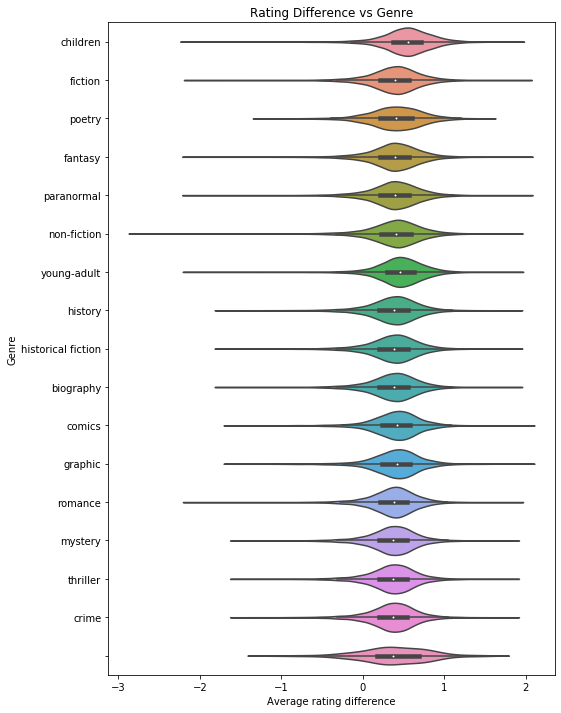

In [93]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="rating_diff", y="cleaned_genres", data=b1NF, figsize=(20,20))
plt.xlabel('Average rating difference')
plt.ylabel('Genre')
plt.title('Rating Difference vs Genre')
plt.show()

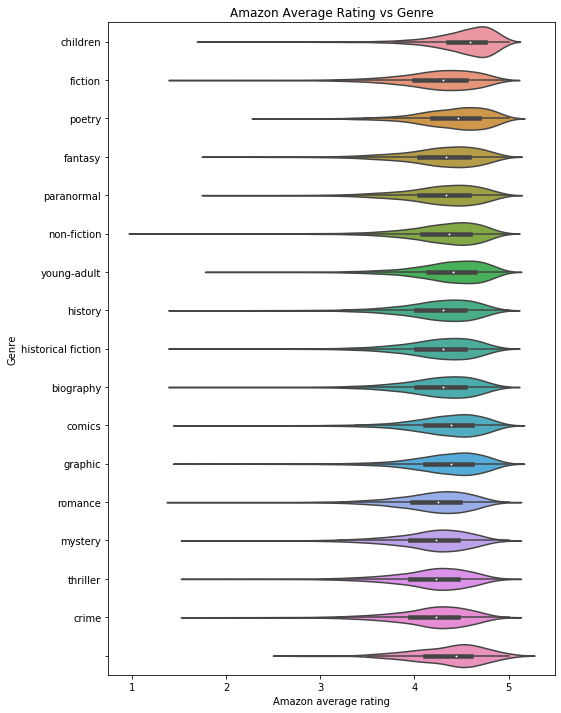

In [98]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="amazon_average", y="cleaned_genres", data=b1NF, figsize=(20,20))
plt.xlabel('Amazon average rating')
plt.ylabel('Genre')
plt.title('Amazon Average Rating vs Genre')
plt.show()

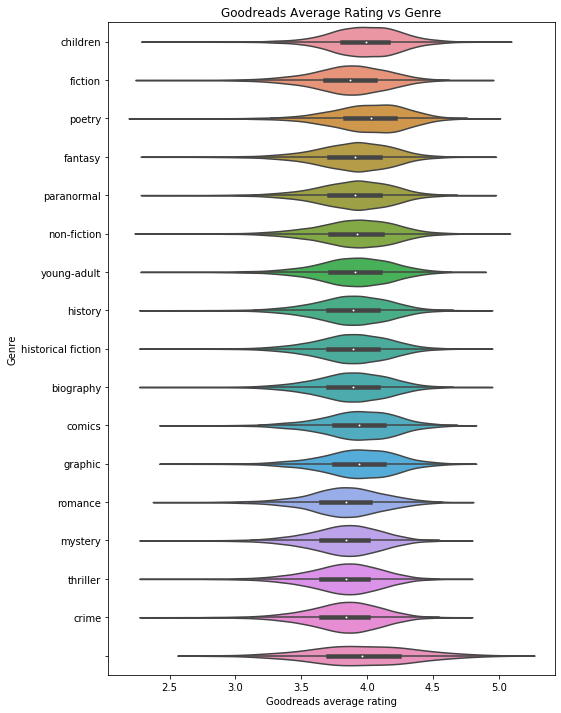

In [99]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="gr_average", y="cleaned_genres", data=b1NF, figsize=(20,20))
plt.xlabel('Goodreads average rating')
plt.ylabel('Genre')
plt.title('Goodreads Average Rating vs Genre')
plt.show()